# Appendix D: Data viz

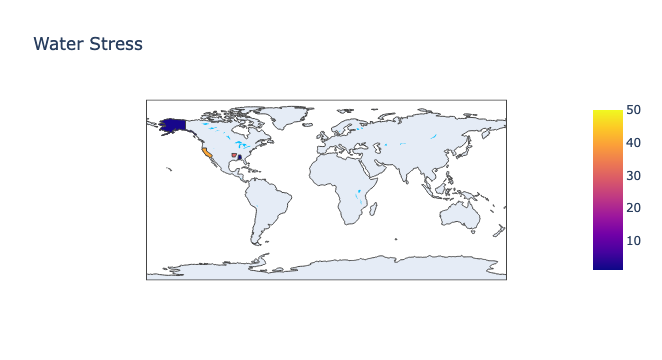

In [6]:
# Plotly choropleth map documentation:
# https://plotly.com/python/choropleth-maps/

import pandas as pd
import chart_studio.plotly as py
import plotly.offline as po
import plotly.graph_objs as pg
import matplotlib.pyplot as plt
%matplotlib inline
po.init_notebook_mode(connected = True)

data = dict(
    type = 'choropleth', 
    locations = ['AL', 'AK', 'AR', 'CA'], 
    locationmode = 'USA-states', 
    z = [1,2,30,40,50], 
    text = ['alabama', 'alaska', 'arizona', 'pugger', 'california']
)

layout = dict(title = 'Water Stress', 
              geo = dict(scope = 'world' , 
                         showlakes = True, 
                         lakecolor = 'rgb(0,191,255)'))
x = pg.Figure(data = [data], 
              layout = layout)
po.iplot(x)

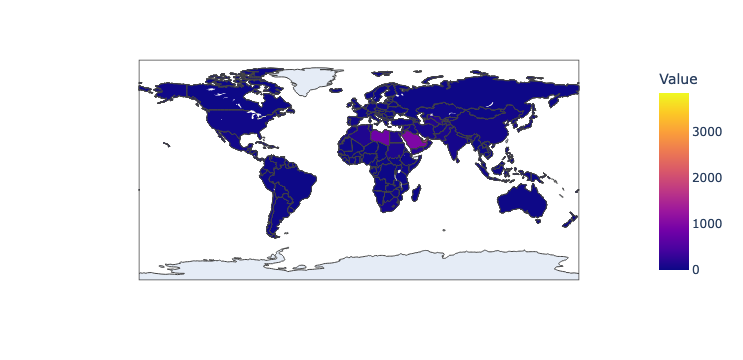

3850.5


In [27]:
import plotly.express as px

df = pd.read_csv("datasets/6.4.2_Level_of_Water_Stress.csv")
df = df[(df["Activity"] == "TOTAL") & (df["TimePeriod"] >= 2015)]
fig = px.choropleth(df, locations="ISOalpha3",
                    color="Value", # water stress index
                    hover_name="GeoAreaName", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()
print(df['Value'].max())

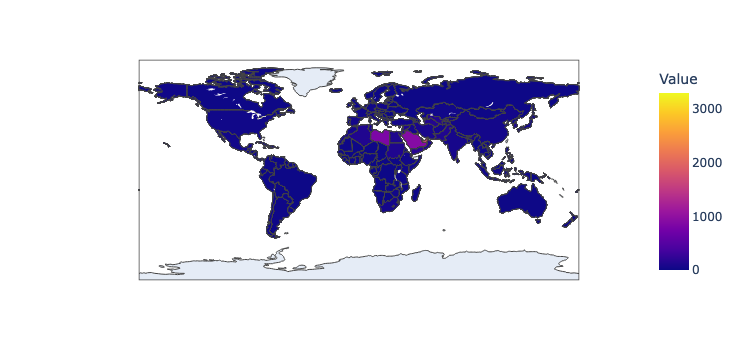

In [18]:
import plotly.express as px

df = pd.read_csv("datasets/6.4.2_Level_of_Water_Stress.csv")
df = df[(df["Activity"] == "TOTAL") & (df["TimePeriod"] < 2015)]
fig = px.choropleth(df, locations="ISOalpha3",
                    color="Value", # water stress index
                    hover_name="GeoAreaName", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()